ch3. DNN
------------

Deep Neural Network(심층신경망)은 은닉 계층을 많이 쌓아서 만든 인공지능 기술
- ANN 대비 수 백개의 은닉 계층으로 구성됨

### 3.1 DNN 원리

DNN은 은닉 계층이 여러 개인 인공신경망

- DNN의 개념과 구조
- 경사도 소실 문제와 ReLu 활성화 함수
- DNN 구현 단계

### 3.1.1 DNN 개념과 구조

- 은닉 계층이 여러 개인 신경망
- 입력 - 제1 은닉 계층 - 제2 은닉 계층 - 출력 계층
  - 제1 은닉 계층이 출력 계층이 아닌 제2 은닉 계층으로 들어감
  - 제2 은닉 계층오 은닉 계층이 더 있다면 은닉 계층으로 들어갈 수 있음
  - 보다 정교한 신호 처리 가능
- DNN은 복잡한 데이터를 학습하려고 은닉 계층 수를 늘린 방식
  - 이 때문에 전체 노드 수가 늘어나 과적합이 될 수 있고, 효과적으로 관리 할 수 있는 방안도 개발 중
- 과적합을 얼마나 방지하느냐가 열쇠

### 3.1.2 경사도 소실 문제와 ReLu 활성화 함수

**vanishing gradient probelm**
- 경사소 소실 문제
- 여러 은닉 계층으로 구성되어 학습에 사용하는 활성화 함수에 따라 경사도 소실이 발생할 수 있음
- DNN은 여러 계층으로 구성되어 있고, 각 계층 사이에 활성화 함수가 반복적으로 들어 있어 backpropagation 계산할 때 경사도 계산이 누적
- 이로 인해 성능이 나빠질 수 있음
- 시그모이드 함수 같이 입력을 특정 범위로 줄이는 활성화 함수들은 입력이 크면 경사도가 매우 작아져 경사도 소실 유발 가능성 높음

![alt text](https://image.slidesharecdn.com/cnnandvggbyselee-170215052228/95/cnn-vgg-32-638.jpg?cb=1506497593)


각 activation function을 살펴보면 vanishing gradient가 발생하는 것을 확인 할 수 있음


**ReLu 활성화 함수**
- 경사도 소실 문제를 극복하기 위해 사용
- 0 이하는 0의 값, 그 이상은 비례관계로 구성
- Relu는 손실 문제에 덜 민감함

### 3.1.3 DNN 구현 단계

1. 기본 파라미터 설정
2. 분류 DNN 모델 구현
3. 데이터 준비
4. DNN의 학습 및 성능 평가

### 3.2 필기체를 분류하는 DNN 구현

#### 3.2.1 기본 파라미터 설정

DNN 구현에 필요한 필요한 파라미터 정의

In [1]:
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

#### 3.2.2 DNN 모델 구현

객체지향 방식으로 DNN 모델링 구현

In [4]:
import numpy as np
from keras import layers, models
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

In [34]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
    
        # add hidden layer - 1
        self.add(layers.Dense(
            Nh_l[0],
            activation='relu',
            input_shape=(Nin,),
            name='Hidden-1'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(0.2))
        
        
        # add hidden layer - 2, input 별도 설정 필요 없다. 알아서 잡아줌
        self.add(layers.Dense(
            Nh_l[1],
            activation='relu',
            name='Hidden-2'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(0.2))
        
        # 출력 노드
        self.add(layers.Dense(Nout, activation='softmax'))
    
        self.compile(
            loss='categorical_crossentropy', # 분류할 클래스가 2개 이상이므로 사용
            optimizer='adam', # 최적화 방법
            metrics=['accuracy'] # 정확성
        )

첫 번째 hidden layer는 이름을 지어줌 (Hidden-1)
- Dropout
  - Dropout(p)는 p라는 확률로 출력 노드의 신호를 보내다 말다 함
  - 드롭아웃을 적용한 다음에 오는 계층은 앞 계층의 일부 노드들의 신호가 p라는 확률로 단절되기 때문에 훨씬 더 견고하게 신호에 적응
  - Dropout은 학습할 때와 성능 평가할 때 다르게 동작
  - 케라스는 이 차이를 자동으로 처리함


Hidden-2
제2 hidden layer는 케라스가 자동으로 현재 계층의 입력 노드 수를 앞에 나온 hidden layer 출력 수로 설정해줌
- 번거로운 신경망 모델링을 피할 수 있음


출력 노드
- 활성화 함수 softmax
- 내부적으로 keras.activation.softmax()를 사용

compile
- 클래스가 2개 이상이므로 categorical_crossentropy
- 최적화 adam
- 성능은 accuracy

In [11]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [12]:
def main():
    Nin = 784
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class
    
    model = DNN(Nin, Nh_l, Nout)
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    

if __name__=="__main__":
    main()

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.5407 - acc: 0.8376 - val_loss: 0.1912 - val_acc: 0.9447
Epoch 2/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.2382 - acc: 0.9292 - val_loss: 0.1396 - val_acc: 0.9581
Epoch 3/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.1818 - acc: 0.9459 - val_loss: 0.1193 - val_acc: 0.9647
Epoch 4/100
48000/48000 [==============================] - 2s 38us/step - loss: 0.1492 - acc: 0.9546 - val_loss: 0.1046 - val_acc: 0.9687
Epoch 5/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.1292 - acc: 0.9611 - val_loss: 0.0978 - val_acc: 0.9713
Epoch 6/100
48000/48000 [==============================] - 2s 37us/step - loss: 0.1138 - acc: 0.9659 - val_loss: 0.0935 - val_acc: 0.9719
Epoch 7/100
48000/48000 [==============================] - 2s 40us/step - 

### 3.3 컬러 이미지를 분류하는 DNN 구현

1. CIFAR - 10 데이터 소개
2. 데이터 불러오기
3. DNN 모델링
4. 학습 효과 분석 준비
5. DNN 학습 및 성능 평가

### 3.3.1 CIFAR - 10 데이터 소개

- CIFAR - 10 데이터 셋은 10가지 사물이 담긴 컬러 이미지입니다. 총 6만장, 이 중 5만 장은 학습용, 1만 장은 평가용
- 사진 크기 32 * 32, RGB로 구성된 컬러 이미지이므로 32 * 32 * 3이 이미지 한 장당 원소수

### 3.3.2 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
from keras.utils import np_utils # for to_categorical()

%matplotlib inline

Using TensorFlow backend.


In [36]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
Y_train = np_utils.to_categorical(y_train)

In [39]:
np_utils.to_categorical?

Signature: np_utils.to_categorical(y, num_classes=None)
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with categorical_crossentropy.

# Arguments
    y: class vector to be converted into a matrix
        (integers from 0 to num_classes).
    num_classes: total number of classes.

# Returns
    A binary matrix representation of the input.
File:      /opt/conda/lib/python3.7/site-packages/keras/utils/np_utils.py
Type:      function


- categorical data를 이진 분류할 수 있는 벡터로 변환
- one-hot encoding으로 이해함

In [40]:
y_train.shape

(50000, 1)

In [41]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [42]:
Y_train.shape

(50000, 10)

In [43]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [2]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    # 목표값은 0~9까지 정수값으로 저장 되어 있어서 to_categorical()을 이용해서 10개의 원소 가진 이진 벡터로 분류
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    
    # 컬러값을 포함하는 이미지 배열을 DNN이 다룰 수 있도록 차원 변환
    # 컬러 이미지는 채널이 포함된 4차원이기 때문에 L, W, H, C 정보를 가져옴
    # L : 데이터 수
    # W : 이미지 넓이(y축)
    # H : 이미지 높이(x축)
    # C : 채널 수
    # DNN은 벡터 형태의 정ㅂ를 다루기 때문에 데이터의 차원을 2로 하고 첫 줄은 L로 설정하고 둘째 줄은 나머지 곱한 값
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    
    return (X_train, Y_train), (X_test, Y_test)

In [5]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Pd_1, Nout): # PD_1 is argument for dropout parameter
        super().__init__() # 부모 클래스 상속한 후 사용
        
        # add hidden layer - 1
        self.add(layers.Dense(
            Nh_1[0],
            activation='relu',
            input_shape=(Nin,),
            name='Hidden-1'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(Pd_1[0]))
        
        # add hidden layer - 2, input 별도 설정 필요 없다. 알아서 잡아줌
        self.add(layers.Dense(
            Nh_1[1],
            activation='relu',
            name='Hidden-2'
        ))
        
        # dropout node at probability 0.2
        self.add(layers.Dropout(Pd_1[1]))
        
        self.add(layers.Dense(Nout, activation='softmax'))
        
        self.compile(
            loss='categorical_crossentropy', # 분류할 클래스가 2개 이상이므로 사용
            optimizer='adam', # 최적화 방법
            metrics=['accuracy'] # 정확성
        )

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_loss']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [7]:
def plot_acc(history):
    plt.plot(history.history['acc'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_acc']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.9191 - acc: 0.3048 - val_loss: 1.8548 - val_acc: 0.3326
Epoch 2/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.7555 - acc: 0.3736 - val_loss: 1.7360 - val_acc: 0.3804
Epoch 3/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.6884 - acc: 0.3948 - val_loss: 1.6879 - val_acc: 0.3972
Epoch 4/100
40000/40000 [==============================] - 3s 69us/step - loss: 1.6384 - acc: 0.4134 - val_loss: 1.6280 - val_acc: 0.4232
Epoch 5/100
40000/40000 [==============================] - 3s 72us/step - loss: 1.6044 - acc: 0.4273 - val_loss: 1.6525 - val_acc: 0.4134
Epoch 6/100
40000/40000 [==============================] - 3s 71us/step - loss: 1.5756 - acc: 0.4409 - val_loss: 1.5957 - val_acc: 0.4362
Ep

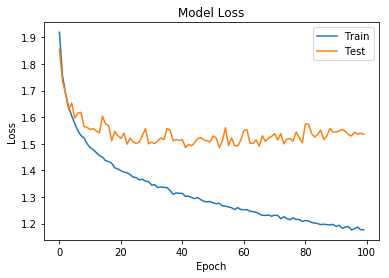

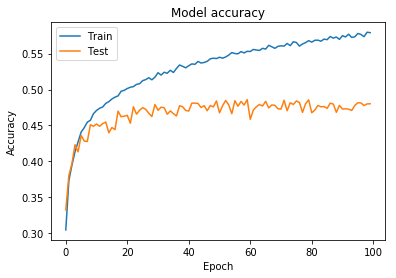

In [8]:
def main():
    Nh_1 = [100, 50]
    pd_1 = [0.0, 0.0]
    number_of_class = 10
    Nout = number_of_class
    
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    # X_train.shape[1] : 길이가 (3072, )
    model = DNN(X_train.shape[1], Nh_1, pd_1, Nout)
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    

if __name__=="__main__":
    main()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 87us/step - loss: 2.1218 - acc: 0.2066 - val_loss: 1.9314 - val_acc: 0.2855
Epoch 2/100
40000/40000 [==============================] - 3s 71us/step - loss: 1.9488 - acc: 0.2837 - val_loss: 1.8516 - val_acc: 0.3299
Epoch 3/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.8978 - acc: 0.3071 - val_loss: 1.8363 - val_acc: 0.3430
Epoch 4/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.8701 - acc: 0.3242 - val_loss: 1.8055 - val_acc: 0.3541
Epoch 5/100
40000/40000 [==============================] - 3s 66us/step - loss: 1.8471 - acc: 0.3334 - val_loss: 1.7957 - val_acc: 0.3563
Epoch 6/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.8331 - acc: 0.3364 - val_loss: 1.7672 - val_acc: 0.3665
Epoch 7

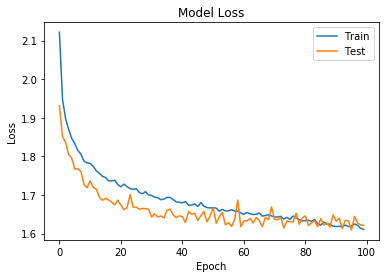

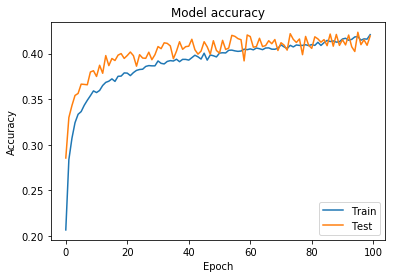

In [9]:
# dropout : pd_1 = [0.05, 0.5]

def main():
    Nh_1 = [100, 50]
    pd_1 = [0.05, 0.5]
    number_of_class = 10
    Nout = number_of_class
    
    
    (X_train, y_train), (X_test, y_test) = Data_func()
    # X_train.shape[1] : 길이가 (3072, )
    model = DNN(X_train.shape[1], Nh_1, pd_1, Nout)
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    

if __name__=="__main__":
    main()

- Dropout을 이용하여 train와 test 간의 성능 차이를 줄였다.